## Step 1:Import the Cereals Data

In [8]:
#Import CSV file
import numpy as np
import pandas as pd
dfcereal=pd.read_csv('F://Data/cereal.csv',sep=",")
dfcereal.head()

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.0,-1.00
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,3,320,25,1.0,0.33
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,3,330,25,1.0,0.50
4,Almond_Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.0,0.75


In [9]:
#print many statements at the same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
#find the number of rows and columns
dfcereal.shape
dfcereal.columns

(74, 15)

Index(['Cereal Name', 'Manufacturer', 'Type', 'Calories', 'Protein (g)', 'Fat',
       'Sodium', 'Dietary Fiber', 'Carbs', 'Sugars', 'Display Shelf',
       'Potassium', 'Vitamins and Minerals', 'Serving Size Weight',
       'Cups per Serving'],
      dtype='object')

In [12]:
#aggregate information at the store level
df_pivot = pd.pivot_table(dfcereal,values=['Cereal Name','Type','Calories','Calories', 'Protein (g)', 'Fat',
       'Sodium', 'Dietary Fiber', 'Carbs', 'Sugars', 'Display Shelf',
       'Potassium', 'Vitamins and Minerals', 'Serving Size Weight',
       'Cups per Serving'], index = 'Manufacturer',aggfunc=np.median)
df_pivot.head()                         
df_pivot.shape 

,Calories,Carbs,Cups per Serving,Dietary Fiber,Display Shelf,Fat,Potassium,Protein (g),Serving Size Weight,Sodium,Sugars,Vitamins and Minerals
Manufacturer,,,,,,,,,,,,
American Home Food Products,100,16.00,-1.000,0.0,2.0,1.0,95.0,4.0,1.0,0.0,3.0,25.0
General Mills,110,14.25,0.875,1.5,2.0,1.0,80.0,2.0,1.0,200.0,8.5,25.0
Kelloggs,110,15.00,0.750,1.0,3.0,0.0,60.0,3.0,1.0,170.0,7.0,25.0
Nabisco,90,17.50,0.500,3.0,1.5,0.0,107.5,3.0,1.0,7.5,0.0,0.0
Post,110,13.00,0.710,3.0,3.0,0.5,87.5,3.0,1.0,155.0,8.0,25.0


(7, 12)

In [15]:
#scale all variable between 0 and 1 
from sklearn.preprocessing import MinMaxScaler
scld=MinMaxScaler(feature_range=(0,1))
arr_scld = scld.fit_transform(df_pivot)
df_scld=pd.DataFrame(arr_scld,columns=df_pivot.columns)
df_scld.head()
df_scld.shape
df_scld.describe()
import warnings
warnings.filterwarnings('ignore')

C:\Users\gauth\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Calories,Carbs,Cups per Serving,Dietary Fiber,Display Shelf,Fat,Potassium,Protein (g),Serving Size Weight,Sodium,Sugars,Vitamins and Minerals
0,0.5,0.727273,0.000000,0.000000,0.50,0.50,0.761905,1.0,0.0,0.000000,0.352941,1.0
1,1.0,0.409091,1.000000,0.500000,0.50,0.50,0.476190,0.0,0.0,0.930233,1.000000,1.0
2,1.0,0.545455,0.933333,0.333333,1.00,0.00,0.095238,0.5,0.0,0.790698,0.823529,1.0
3,0.0,1.000000,0.800000,1.000000,0.25,0.00,1.000000,0.5,0.0,0.034884,0.000000,0.0
4,1.0,0.181818,0.912000,1.000000,1.00,0.25,0.619048,0.5,0.0,0.720930,0.941176,1.0


(7, 12)

,Calories,Carbs,Cups per Serving,Dietary Fiber,Display Shelf,Fat,Potassium,Protein (g),Serving Size Weight,Sodium,Sugars,Vitamins and Minerals
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,7.000000
mean,0.678571,0.551948,0.781333,0.523810,0.571429,0.357143,0.469388,0.392857,0.0,0.546512,0.613445,0.785714
std,0.374007,0.386077,0.349733,0.365510,0.374007,0.349319,0.357860,0.349319,0.0,0.416824,0.359188,0.393398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.500000,0.295455,0.845333,0.333333,0.375000,0.125000,0.214286,0.125000,0.0,0.191860,0.411765,0.750000
50%,0.750000,0.545455,0.912000,0.500000,0.500000,0.250000,0.476190,0.500000,0.0,0.720930,0.705882,1.000000
75%,1.000000,0.863636,0.933333,0.750000,0.875000,0.500000,0.690476,0.500000,0.0,0.860465,0.882353,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [16]:
#lets build clusters
from sklearn.cluster import KMeans
num_of_clusters= range(2,8)
error = []
 
for num_clusters in num_of_clusters:
    clusters= KMeans(num_clusters)
    clusters.fit(df_scld)
    error.append(clusters.inertia_/100)
    
df = pd.DataFrame({"Cluster_Number": num_of_clusters,"Error_term":error})
df

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,Cluster_Number,Error_term
0,2,0.053725
1,3,0.035179
2,4,0.020831
3,5,0.009563
4,6,0.004664
5,7,0.000000


In [4]:
# To convert objects to int
for col in dfcredit.columns:
    if dfcredit[col].dtype=='object':
        dfcredit[col]=pd.Categorical(dfcredit[col]).codes
dfcredit.head(2)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,1,0,1,2,333
1,106.025,6645,483,3,82,15,0,1,1,1,903


In [10]:
#find the number of rows and columns
dfcereal.shape
dfcereal.columns

(74, 15)

Index(['Cereal Name', 'Manufacturer', 'Type', 'Calories', 'Protein (g)', 'Fat',
       'Sodium', 'Dietary Fiber', 'Carbs', 'Sugars', 'Display Shelf',
       'Potassium', 'Vitamins and Minerals', 'Serving Size Weight',
       'Cups per Serving'],
      dtype='object')

## Step 2: EDA

In [ ]:
!pip install pandas-profiling
import pandas_profiling

In [6]:
eda_report=pandas_profiling.ProfileReport(dfcredit)

In [7]:
eda_report

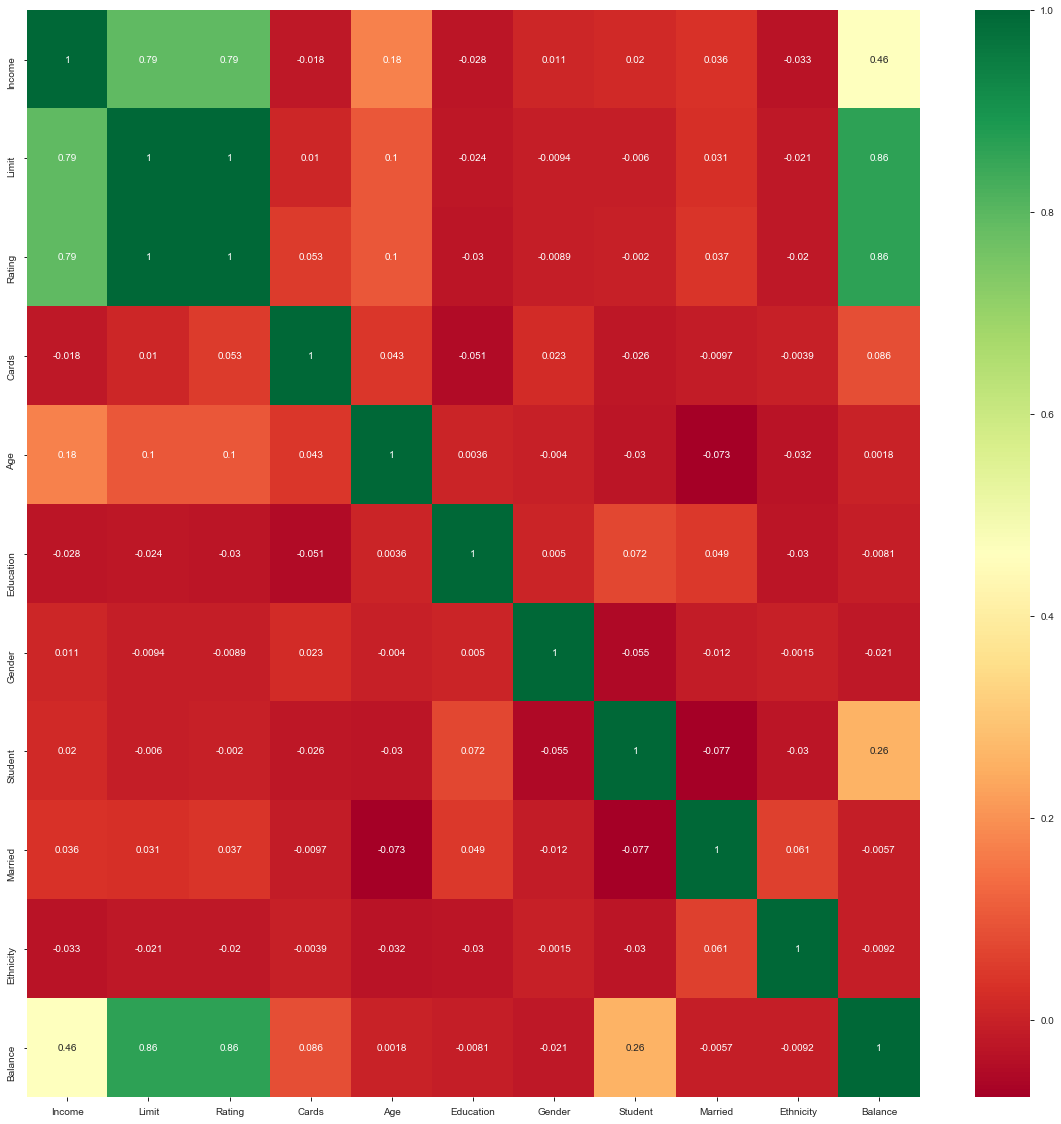

In [8]:
#Plot correlation heat map
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

x=dfcredit.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

## Since rating is having greater correlation with most variables hence removed
## also removed Gender,Married,Ethnicity, Student which are categorical

In [9]:
dfcredit=dfcredit.drop(['Rating','Gender','Married','Ethnicity','Student'],axis=1)
dfcredit.columns

Index(['Income', 'Limit', 'Cards', 'Age', 'Education', 'Balance'], dtype='object')

## Step-3:Scaling (Variables with very different variances are scaled.)

In [10]:
#scale all numerical variables between 0 and 1 
from sklearn.preprocessing import MinMaxScaler
scld=MinMaxScaler(feature_range=(0,1))
arr_scld = scld.fit_transform(dfcredit)
dfcredit_scld=pd.DataFrame(arr_scld,columns=dfcredit.columns)
dfcredit_scld.head()
dfcredit_scld.describe()
import warnings
warnings.filterwarnings('ignore')

C:\Users\gauth\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Income,Limit,Cards,Age,Education,Balance
0,0.025737,0.210675,0.125,0.146667,0.400000,0.166583
1,0.542722,0.443406,0.250,0.786667,0.666667,0.451726
2,0.534598,0.476336,0.375,0.640000,0.400000,0.290145
3,0.786079,0.662353,0.250,0.173333,0.400000,0.482241
4,0.258271,0.309542,0.125,0.600000,0.733333,0.165583


,Income,Limit,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.197781,0.297182,0.244688,0.435567,0.563333,0.260138
std,0.199933,0.176765,0.171409,0.229997,0.208347,0.229994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.060434,0.171006,0.125000,0.250000,0.400000,0.034392
50%,0.129121,0.288520,0.250000,0.440000,0.600000,0.229865
75%,0.267284,0.384266,0.375000,0.626667,0.733333,0.431716
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step-4: Principal Component Analysis (PCA)
## This dataset consists of 11 variables correlated with each other (few heavily),PCA is used to reduce this dimensionality and elimnate the coorelation between the PCA components 

In [11]:
#fit PCA model.The number of components will be same as number of Variables
from sklearn.decomposition import PCA
pca = PCA().fit(dfcredit_scld)

In [12]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
str(pca.explained_variance_ratio_)#first component explains 39.8% of variance,second 21.4%,third 17% and so on

'[0.39856634 0.21381185 0.17455107 0.1211044  0.0867809  0.00518543]'

In [14]:
str(pca.explained_variance_ratio_.sum())

'1.0'

In [15]:
pca=PCA().fit(dfcredit_scld)

In [16]:
np.round(pca.explained_variance_ratio_[0:10]*100,2)

array([39.86, 21.38, 17.46, 12.11,  8.68,  0.52])

In [17]:
str(pca.explained_variance_ratio_.sum()*100)

'100.0'

## Number of components should explain at least 80% of the original data variance 

Text(0.5, 0, 'number of component')

Text(0, 0.5, 'Cummulative explaind Variance')

Text(2, 0.75, '3 PC explains ~80% Variations ')

Text(10.5, 1, 'total number of components')

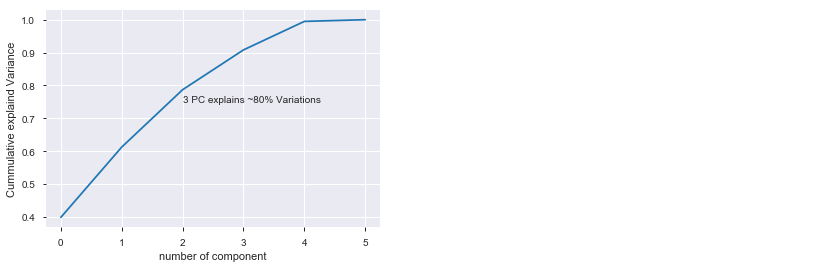

In [18]:
#Plotting relation between compnents and variance(Elbow method)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of component')
plt.ylabel('Cummulative explaind Variance')
plt.annotate('3 PC explains ~80% Variations ',xy=(2,0.75))
plt.annotate('total number of components',xy=(10.5,1))

In [19]:
#from the above graph identified first 3 components has an explaing power of ~80%,So passing first 3 components into pca
pca3=PCA(3).fit(dfcredit_scld)

In [20]:
#Determine the Eigen Values.
pca3.explained_variance_

array([0.09956396, 0.05341132, 0.04360377])

In [21]:
np.round(pca3.explained_variance_ratio_[0:10]*100,2)

array([39.86, 21.38, 17.46])

In [22]:
str(pca3.explained_variance_ratio_.sum()*100)

'78.69292623801843'

In [23]:
#Transformation of original credita data (400X11) in to PCA array (400X3)
x_pca=PCA(n_components=3)
dfcredit_pca=x_pca.fit_transform(dfcredit_scld)
dfcredit_pca.shape
dfcredit_pca

(400, 3)

array([[-0.2356318 ,  0.27467097,  0.15103489],
       [ 0.42604734, -0.31994796, -0.10885746],
       [ 0.32563779, -0.2115868 ,  0.17492272],
       ...,
       [-0.07920352, -0.20504932,  0.13364881],
       [-0.31195544,  0.0934363 ,  0.01078558],
       [ 0.13533515, -0.04191989,  0.4493823 ]])

## The below Heat map ensures there exists no coorelation between the 5 PCA components
## Hence Dimension reduced from 11 to 5, Correlation between columns adrresed

Text(0.5, 1.0, 'correlation between different features')

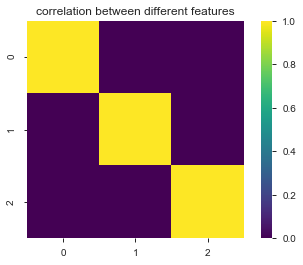

In [24]:
import seaborn as sns
correlation=pd.DataFrame(dfcredit_pca).corr()
sns.heatmap(correlation,vmax=1,square=True,cmap='viridis')
plt.title('correlation between different features')

## Determine (measure) the loading of the original credit data variables on the 3 PCA components created

In [26]:
pca_df=pd.DataFrame(pca3.components_,columns=dfcredit.columns)
pca_df

,Income,Limit,Cards,Age,Education,Balance
0,0.508430,0.549079,0.033297,0.138573,-0.024031,0.647397
1,-0.089380,0.063328,-0.032039,-0.967609,-0.014794,0.224696
2,0.000861,-0.014672,0.119621,0.002783,-0.992197,-0.031810


## In PCA-1 Balance is signficant followed by limit and income,In PCA-2 Age is significant,In PCA-3 Educations is significant

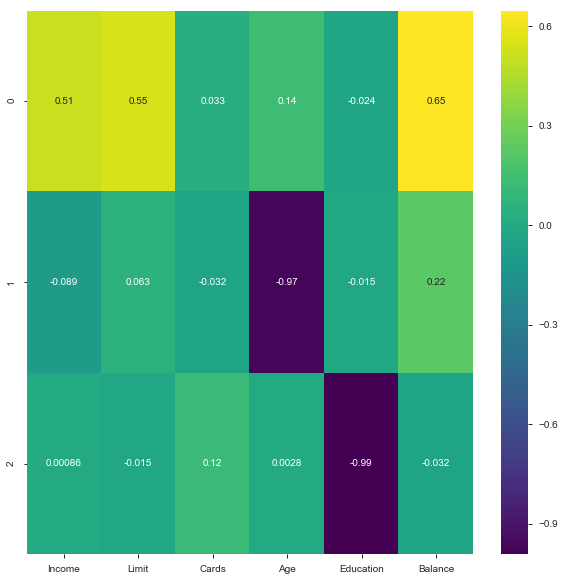

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
import seaborn as sns
sns.heatmap(pca_df,cmap='viridis',annot= True)
plt.show();

In [28]:
dfcredit_scld.shape

(400, 6)

In [31]:
dfcredit_scld_trnsf=pca3.fit_transform(dfcredit_scld)

In [33]:
dfcredit_clstr=pd.DataFrame(dfcredit_scld_trnsf,columns=('P1','P2','P3'))
dfcredit_clstr.head()
dfcredit_clstr.shape

,P1,P2,P3
0,-0.235632,0.274671,0.151035
1,0.426047,-0.319948,-0.108857
2,0.325638,-0.211587,0.174923
3,0.611168,0.276435,0.150048
4,-0.008957,-0.183658,-0.179654


(400, 3)

## Step-5: Cluster

In [34]:
#lets build clusters
from sklearn.cluster import KMeans
num_of_clusters= range(2,10)
error = []
 
for num_clusters in num_of_clusters:
    clusters= KMeans(num_clusters)
    clusters.fit(dfcredit_clstr)
    error.append(clusters.inertia_/100)
    
df = pd.DataFrame({"Cluster_Number": num_of_clusters,"Error_term":error})
df  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,Cluster_Number,Error_term
0,2,0.527172
1,3,0.404032
2,4,0.341573
3,5,0.294010
4,6,0.254929
5,7,0.226194
6,8,0.208628
7,9,0.191484


In [35]:
## Cluster Prerequisite: Determine the optimum number of clusters required

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'Number of Cluster')

Text(0, 0.5, 'SSE')

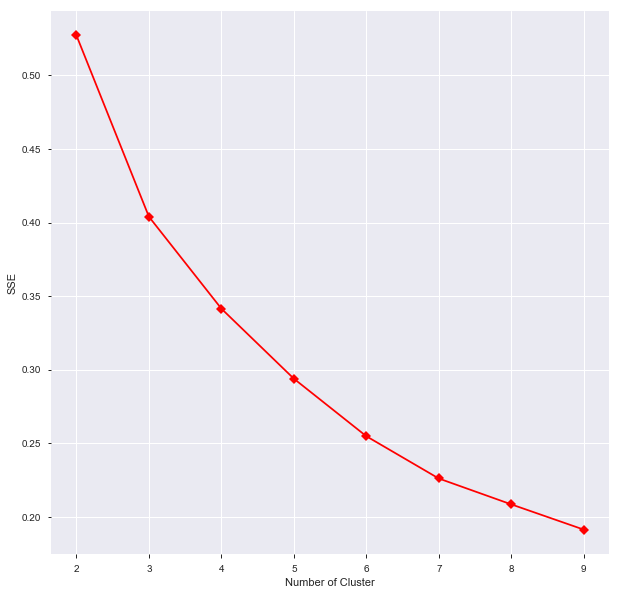

In [36]:
#find out the right number of clusters
plt.figure(figsize=(10,10))
plt.plot(df.Cluster_Number,df.Error_term,marker="D",color='red')
plt.xlabel('Number of Cluster')
plt.ylabel('SSE')
plt.show()

In [72]:
#build with 3 clusters
clusters = KMeans(3)
clusters.fit(dfcredit_clstr)
clusters.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1,
       2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 2, 0,
       0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       1, 2, 2, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0, 2, 1, 0, 2,
       0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 0, 0, 1, 2, 1, 2, 0, 2,
       0, 1, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2,
       0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 1, 2,
       2, 0, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0,
       2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 2,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0,
       2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0,

## Attach this cluster label column to the original credit Data Frame

In [73]:
dfcredit['cluster'] = clusters.labels_
dfcredit.head()
dfcredit.tail()

,Income,Limit,Cards,Age,Education,Balance,cluster
0,14.891,3606,2,34,11,333,0
1,106.025,6645,3,82,15,903,1
2,104.593,7075,4,71,11,580,1
3,148.924,9504,3,36,11,964,1
4,55.882,4897,2,68,16,331,2


,Income,Limit,Cards,Age,Education,Balance,cluster
395,12.096,4100,3,32,13,560,0
396,13.364,3838,5,65,17,480,2
397,57.872,4171,5,67,12,138,2
398,37.728,2525,1,44,13,0,0
399,18.701,5524,5,64,7,966,1


In [74]:
cluster={'0':'Hi','1':'Hello','2':'Welcome'}

In [75]:
dfcredit_pivot=pd.pivot_table(dfcredit,index='cluster',aggfunc=np.median)
dfcredit_pivot

,Age,Balance,Cards,Education,Income,Limit
cluster,,,,,,
0,39,483.5,3,14,28.1575,4525
1,66,1081.0,3,13,82.7060,7518
2,68,108.0,3,14,27.3490,3271


In [76]:
dfcredit.groupby('cluster').size()

cluster
0    156
1     93
2    151
dtype: int64

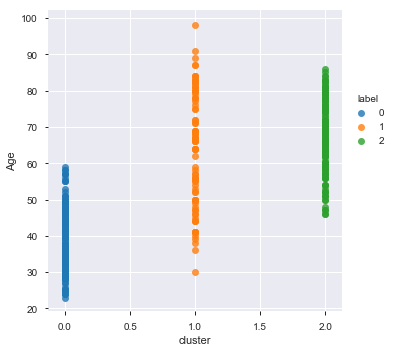

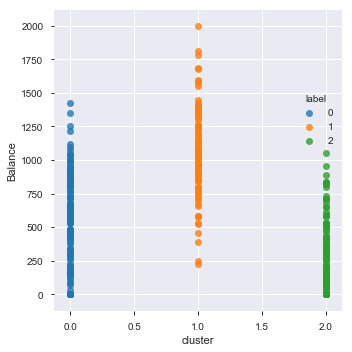

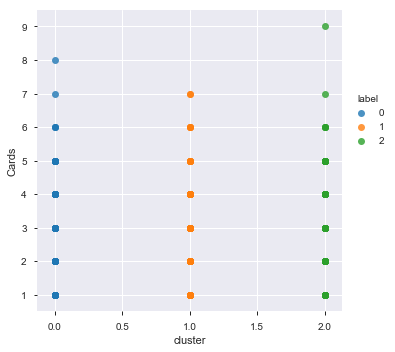

In [77]:
#Plots to study cluster response to Age
facet = sns.lmplot(data=dfcredit, x='cluster', y='Age', hue='cluster', 
                   fit_reg=False, legend=False)
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)

#Plots to study cluster response to Balance
facet = sns.lmplot(data=dfcredit, x='cluster', y='Balance', hue='cluster', 
                   fit_reg=False, legend=False)
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)

#Plots to study cluster response to Cards
facet = sns.lmplot(data=dfcredit, x='cluster', y='Cards', hue='cluster', 
                   fit_reg=False, legend=False)
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)



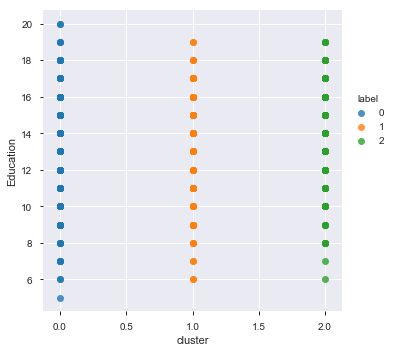

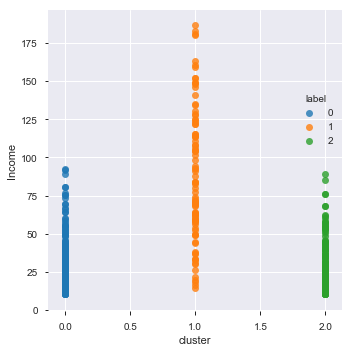

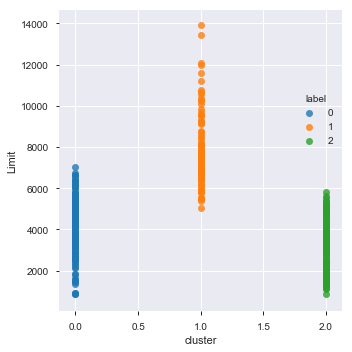

In [78]:

#Plots to study cluster response to Education
facet = sns.lmplot(data=dfcredit, x='cluster', y='Education', hue='cluster', 
                   fit_reg=False, legend=False)
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)

#Plots to study cluster response to Income
facet = sns.lmplot(data=dfcredit, x='cluster', y='Income', hue='cluster', 
                   fit_reg=False, legend=False)
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)

#Plots to study cluster response to Limit
facet = sns.lmplot(data=dfcredit, x='cluster', y='Limit', hue='cluster', 
                   fit_reg=False, legend=False)
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)

## Cluster 1- (Riskless MASS)-
## Riskless-credit to Middle aged group and Senior Smaritans,This Cluster focusses Middle aged group and senior citizen but credit limit is less and low income group with low balance benefits from this cluster, but credit limit is less hence risk free



## Cluster 2 (YAMA-Young Adults to Middle Aged)
## Targets Young Adults to Middle Aged group,with appropriate Credit limit who have appropriate income and Balance

## Cluster 3 (EGC-Every one gets credit)
## In this Cluster all age groups get credit (no barrier on age group) but credit limit will be appropriate to income and balance
